# Project 2

Olen Sluder

*Project description TBD.*

## Part 1

**Learning Objectives**

- Propose two possible datasets you would like to use for Project 2.

### Helper code

> Programs must be written for people to read, and only incidentally for machines to execute. ―Harold Abelson and Gerald Jay Sussman, *Structure and Interpretation of Computer Programs* (1984)

In [7]:
import matplotlib as mpl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Check the current version of packages
print('Package Versions:')
print(f'\tMatplotlib = {mpl.__version__}')
print(f'\tPandas = {pd.__version__}')
print(f'\tSeaborn = {sns.__version__}')


def barplot(data,
            x,
            figsize=(10, 5),
            tight_layout=True,
            title='',
            xlabel='',
            xtick_labels=[],
            xtick_rotation=0):
  """
  Plot bar plot for specified column.

  Args:
    data (pandas.core.DataFrame): The DataFrame being plotted.
    x (str): The name of the column to plot on the x-axis.
    figsize (tuple): The size of the plot's figure.
    tight_layout (bool): Create a tight plot layout?
    title (str): The title of the plot.
    xlabel (str): The x-axis label.
    xtick_labels (list): The x-tick labels.
    xtick_rotation (int): The degrees to rotate the x-tick labels.

  Returns:
    matplotlib.axes._subplots.AxesSubplot: The subplot.
  """
  plt.figure(figsize=figsize)

  ax = sns.countplot(data=data, x=x)

  ax.set_title(title)

  if len(xlabel) > 0:
    ax.set_xlabel(xlabel)

  plt.xticks(rotation=xtick_rotation)

  if len(xtick_labels) > 0:
    ax.set_xticklabels(xtick_labels)

  if tight_layout:
    plt.tight_layout()

  return ax


def display_duplicate_count(data):
  """
  Display a pandas DataFrame's duplicate count.

  Args:
    data (pandas.core.DataFrame): The DataFrame being checked for duplicates.
  """
  try:
    count = data.duplicated().sum()
    print(f'There are {count} duplicates.')
  except AttributeError as ex:
    display(ex)

  return
  

def display_missing_data(data):
  """
  Display a pandas DataFrame's column(s) with missing data.

  Args:
    data (pandas.core.DataFrame): The DataFrame being checked for missing data.
  """
  try:
    missing_data = data.isna().sum()
    missing_data = missing_data[missing_data > 0]
    if len(missing_data) == 0:
      print('There is no missing data.')
    else:
      print(missing_data)
  except AttributeError as ex:
    display(ex)
 
  return
  

def whaleyplot(data,
               x,
               figsize=(10, 5),
               meanprops={'color': 'red', 'linestyle': '--'},
               medianprops={'color': 'black', 'linestyle': '--'},
               notch=False,
               tight_layout=True,
               title='',
               xlabel=''):
  """
  Plot histogram and boxplot on same x-axis for specified column.
 
  Args:
    data (pandas.core.DataFrame): The DataFrame being plotted.
    x (str): The name of the column to plot on the x-axis.
    figsize (tuple): The size of the plot's figure.
    meanprops (Dict): Properties of the mean line.
    medianprops (Dict): Properties of the median line.
    notch (bool): Should the box be notched?
    tight_layout (bool): Create a tight plot layout?
    title (str): The title of the plot.
    xlabel (str): The x-axis label.

  Returns:
    matplotlib.figure.Figure: The subplot figure.
    numpy.ndarray: The subplot axes.

 TODO:
    Implement meanprops and medianprops.
  """
  # Derived from S. Whaley/Coding Dojo, Exemplar DS Project 1
  fig, (histplot, boxplot) = plt.subplots(nrows=2, figsize=figsize, sharex=True)

  sns.histplot(ax=histplot, data=data, x=x, kde=True, legend=True)
  sns.boxplot(ax=boxplot, data=data, x=x, notch=notch)

  mean_value = data[x].mean()
  histplot.axvline(mean_value,
                   color='red', 
                   linestyle='-', 
                   label=f'Mean = {mean_value:,.2f}')
  boxplot.axvline(mean_value,
                  color='red', 
                  linestyle='-')
  
  median_value = data[x].median()
  histplot.axvline(median_value,
                   color='black', 
                   linestyle='-', 
                   label=f'Median = {median_value:,.2f}')
  boxplot.axvline(median_value,
                  color='black', 
                  linestyle='-')
  
  histplot.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=False)
  histplot.set_title(title)

  if len(xlabel) > 0:
    boxplot.set_xlabel(xlabel)
  else:
    boxplot.set_xlabel(x)

  if tight_layout:
    plt.tight_layout()

  return fig, (histplot, boxplot)

Package Versions:
	Matplotlib = 3.6.2
	Pandas = 1.5.2
	Seaborn = 0.12.1


### First Choice: Stellar Classification Dataset (Astronomy)

1. Source of data
- https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17

2. Brief description of data
- From [Kaggle](https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17):
> In astronomy, stellar classification is the classification of stars based on their spectral characteristics. The classification scheme of galaxies, quasars, and stars is one of the most fundamental in astronomy. The early cataloguing of stars and their distribution in the sky has led to the understanding that they make up our own galaxy and, following the distinction that Andromeda was a separate galaxy to our own, numerous galaxies began to be surveyed as more powerful telescopes were built. This datasat aims to classificate stars, galaxies, and quasars based on their spectral characteristics.

  1. obj_ID = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS
  2. alpha = Right Ascension angle (at J2000 epoch)
  3. delta = Declination angle (at J2000 epoch)
  4. u = Ultraviolet filter in the photometric system
  5. g = Green filter in the photometric system
  6. r = Red filter in the photometric system
  7. i = Near Infrared filter in the photometric system
  8. z = Infrared filter in the photometric system
  9. run_ID = Run Number used to identify the specific scan
  10. rereun_ID = Rerun Number to specify how the image was processed
  11. cam_col = Camera column to identify the scanline within the run
  12. field_ID = Field number to identify each field
  13. spec_obj_ID = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)
  14. class = object class (galaxy, star or quasar object)
  15. redshift = redshift value based on the increase in wavelength
  16. plate = plate ID, identifies each plate in SDSS
  17. MJD = Modified Julian Date, used to indicate when a given piece of SDSS data was taken
  18. fiber_ID = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation

3. What is the target?
- class = object class (galaxy, star or quasar object)

4. What does one row represent? (A person?  A business?  An event? A product?)
- An observation of space taken by the Sloan Digital Sky Survey (SDSS)

5. Is this a classification or regression problem?
- Classification

6. How many features does the data have?
- 17

7. How many rows are in the dataset?
- 100,000

8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?
- None

In [8]:
filename = './data/star_classification.csv'
df = pd.read_csv(filename)

df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

### Second Choice: Heart Failure Prediction Dataset

1. Source of data
- https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

2. Brief description of data
- From [Kaggle](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction):
> Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.
>
> People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

  1. Age: age of the patient [years]
  2. Sex: sex of the patient [M: Male, F: Female]
  3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
  4. RestingBP: resting blood pressure [mm Hg]
  5. Cholesterol: serum cholesterol [mm/dl]
  6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
  7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
  8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
  9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
  10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
  11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
  12. HeartDisease: output class [1: heart disease, 0: Normal]

3. What is the target?
- HeartDisease: output class [1: heart disease, 0: Normal]

4. What does one row represent? (A person?  A business?  An event? A product?)
-  A patient

5. Is this a classification or regression problem?
- Classification

6. How many features does the data have?
- 11

7. How many rows are in the dataset?
- 918

8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?
- None

In [10]:
filename = './data/heart.csv'
df2 = pd.read_csv(filename)

df2.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


## Part 2

Using the approved dataset you proposed for project 2 part 1 last week, you will clean and explore the data set.

To meet the requirements for this week you must have:

- Deleted unnecessary columns.
- Deleted duplicate rows.
- Identified and addressed missing values.
- Identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats).
- Produced univariate visuals for the target and all features.
- Identified outliers.
- Clearly commented all of your cleaning steps and described any decisions you made.

Check for duplicates.

In [12]:
display_duplicate_count(df)

There are 0 duplicates.


Check for missing values.

In [13]:
display_missing_data(df)

There is no missing data.


### Features

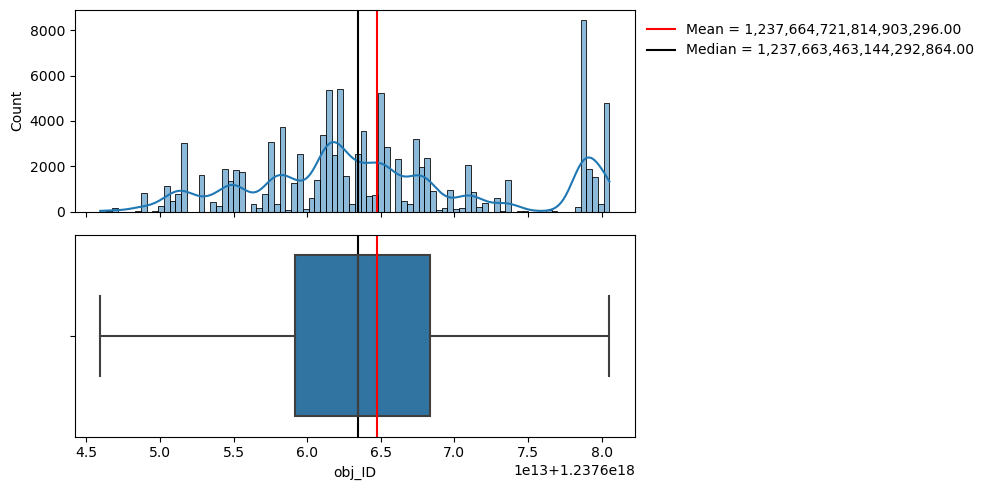

count    1.000000e+05
mean     1.237665e+18
std      8.438560e+12
min      1.237646e+18
25%      1.237659e+18
50%      1.237663e+18
75%      1.237668e+18
max      1.237681e+18
Name: obj_ID, dtype: float64

In [14]:
# obj_ID
whaleyplot(df, 'obj_ID')
plt.show()

print()
df['obj_ID'].describe()

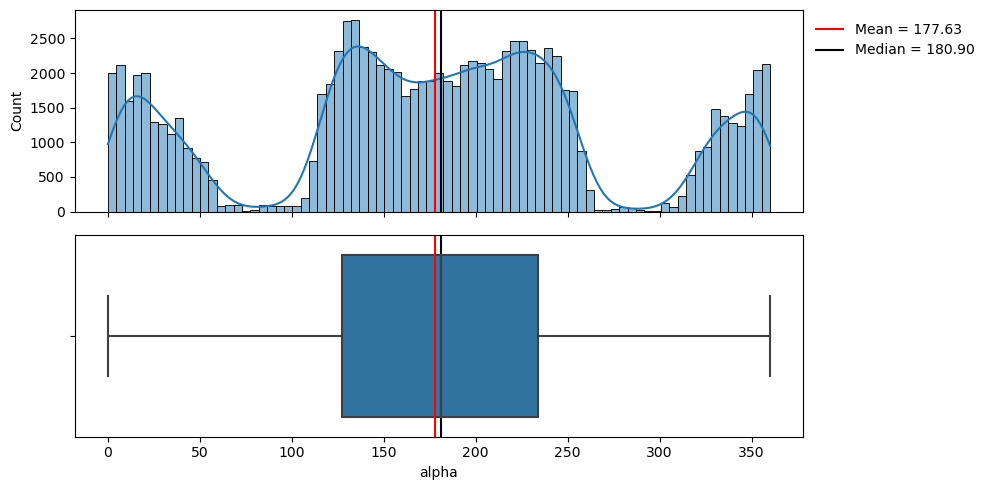

count    100000.000000
mean        177.629117
std          96.502241
min           0.005528
25%         127.518222
50%         180.900700
75%         233.895005
max         359.999810
Name: alpha, dtype: float64

In [15]:
# alpha
whaleyplot(df, 'alpha')
plt.show()

print()
df['alpha'].describe()

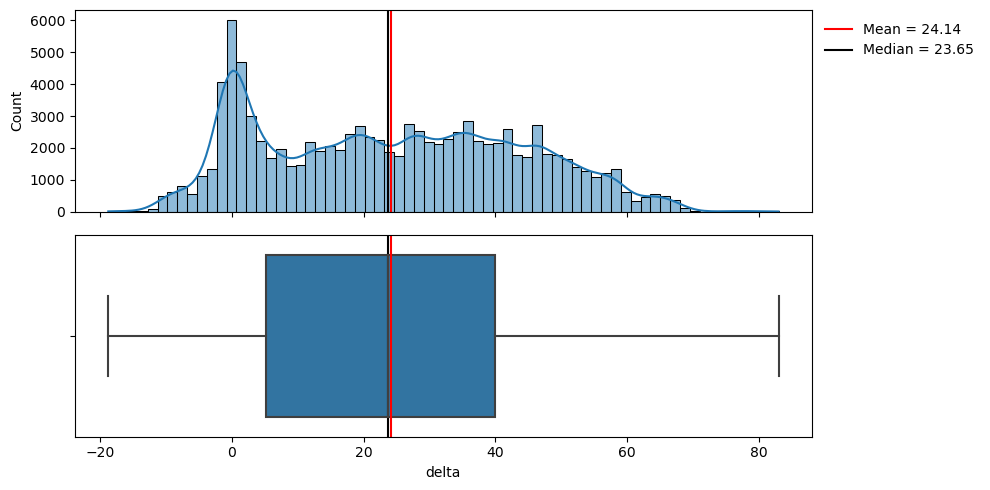

count    100000.000000
mean         24.135305
std          19.644665
min         -18.785328
25%           5.146771
50%          23.645922
75%          39.901550
max          83.000519
Name: delta, dtype: float64

In [16]:
# delta
whaleyplot(df, 'delta')
plt.show()

print()
df['delta'].describe()

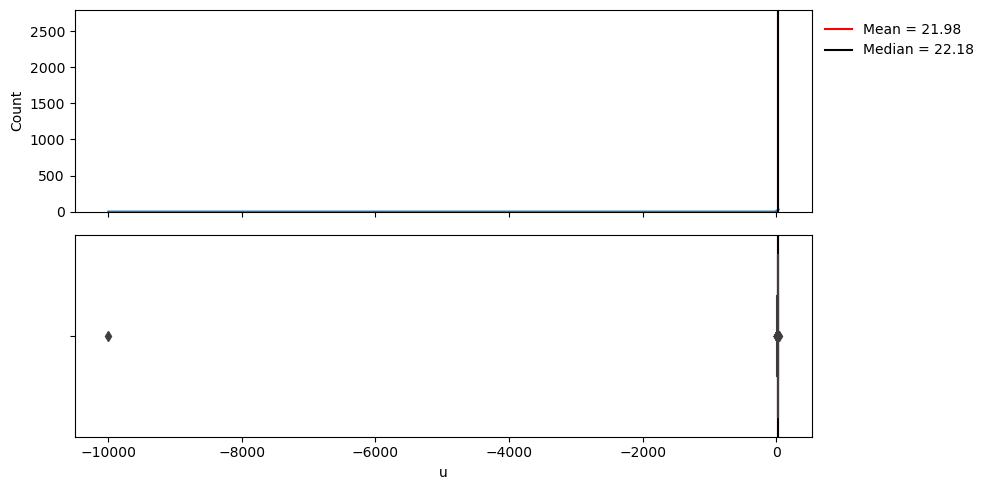

count    100000.000000
mean         21.980468
std          31.769291
min       -9999.000000
25%          20.352353
50%          22.179135
75%          23.687440
max          32.781390
Name: u, dtype: float64

In [17]:
# u
whaleyplot(df, 'u')
plt.show()

print()
df['u'].describe()

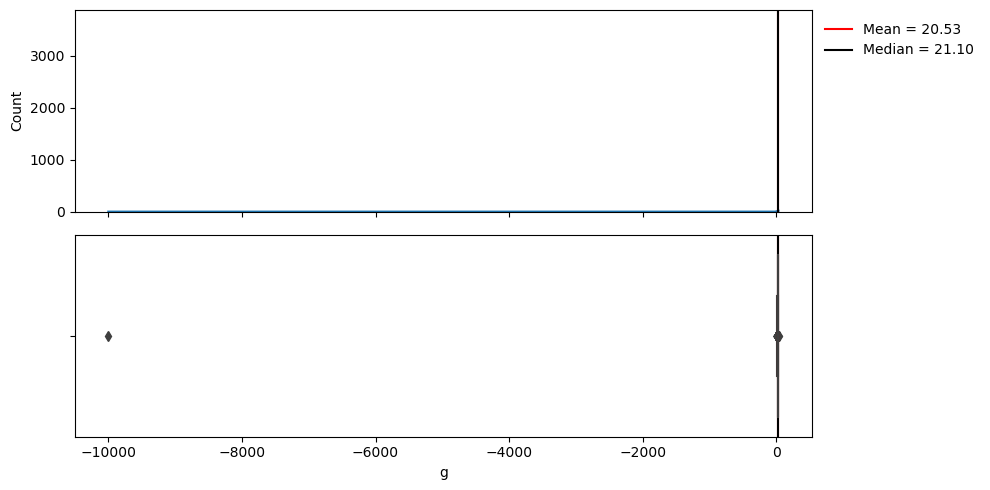

count    100000.000000
mean         20.531387
std          31.750292
min       -9999.000000
25%          18.965230
50%          21.099835
75%          22.123767
max          31.602240
Name: g, dtype: float64

In [18]:
# g
whaleyplot(df, 'g')
plt.show()

print()
df['g'].describe()

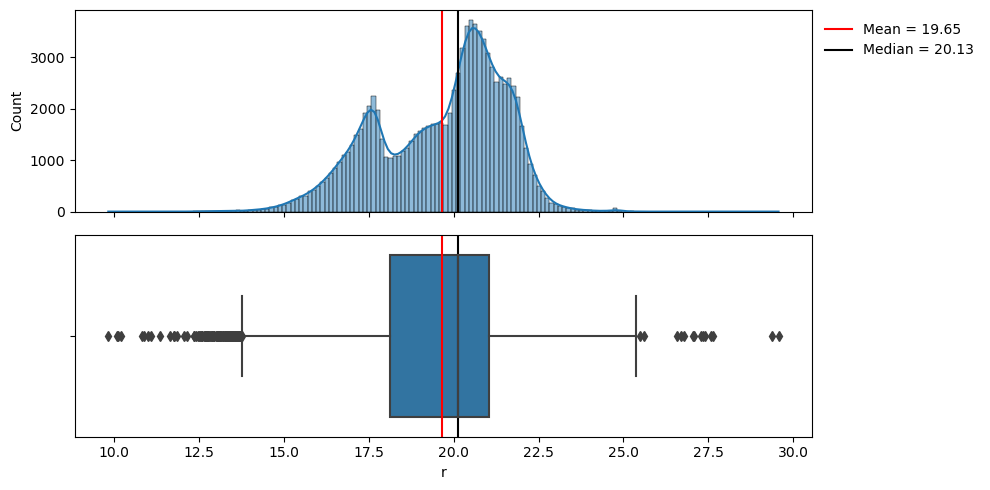

count    100000.000000
mean         19.645762
std           1.854760
min           9.822070
25%          18.135828
50%          20.125290
75%          21.044785
max          29.571860
Name: r, dtype: float64

In [19]:
# r
whaleyplot(df, 'r')
plt.show()

print()
df['r'].describe()

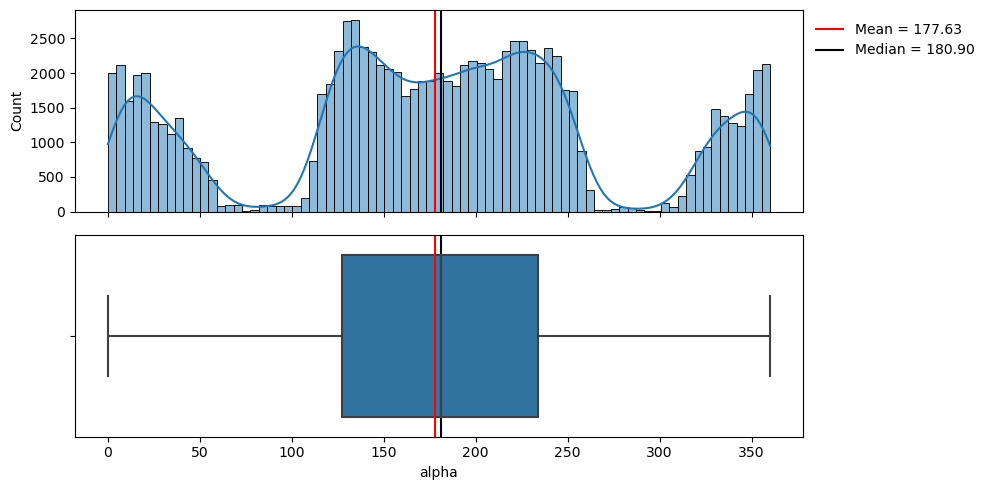

count    100000.000000
mean         19.084854
std           1.757895
min           9.469903
25%          17.732285
50%          19.405145
75%          20.396495
max          32.141470
Name: i, dtype: float64

In [20]:
# i
whaleyplot(df, 'alpha')
plt.show()

print()
df['i'].describe()

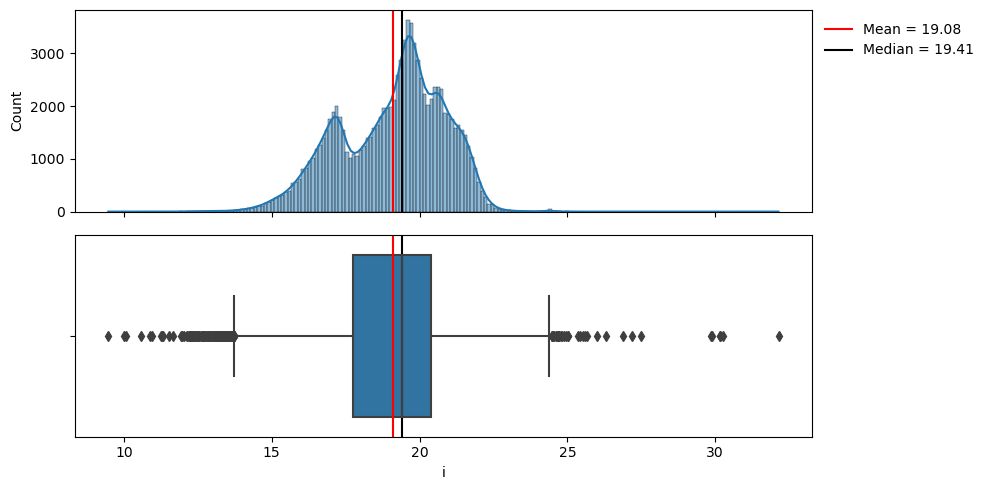

count    100000.000000
mean        177.629117
std          96.502241
min           0.005528
25%         127.518222
50%         180.900700
75%         233.895005
max         359.999810
Name: alpha, dtype: float64

In [21]:
# z
whaleyplot(df, 'i')
plt.show()

print()
df['alpha'].describe()

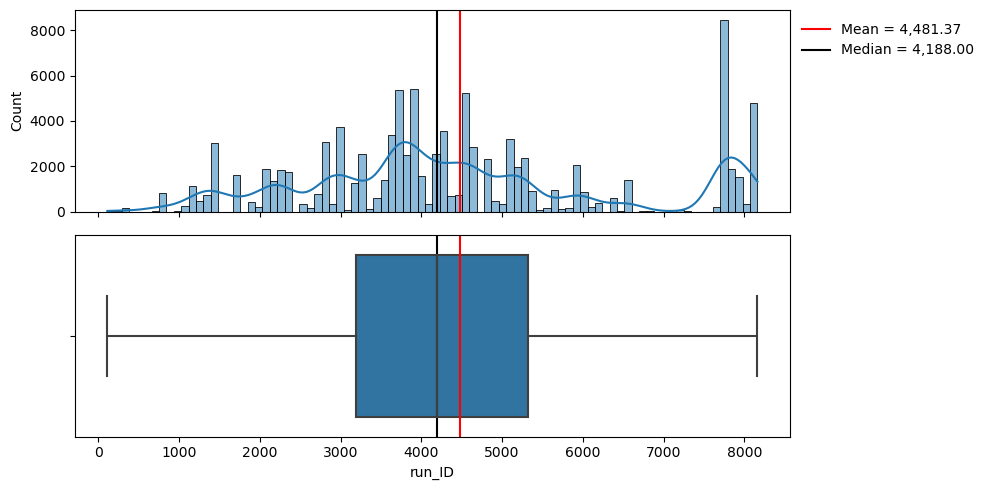

count    100000.000000
mean       4481.366060
std        1964.764593
min         109.000000
25%        3187.000000
50%        4188.000000
75%        5326.000000
max        8162.000000
Name: run_ID, dtype: float64

In [22]:
# run_ID
whaleyplot(df, 'run_ID')
plt.show()

print()
df['run_ID'].describe()

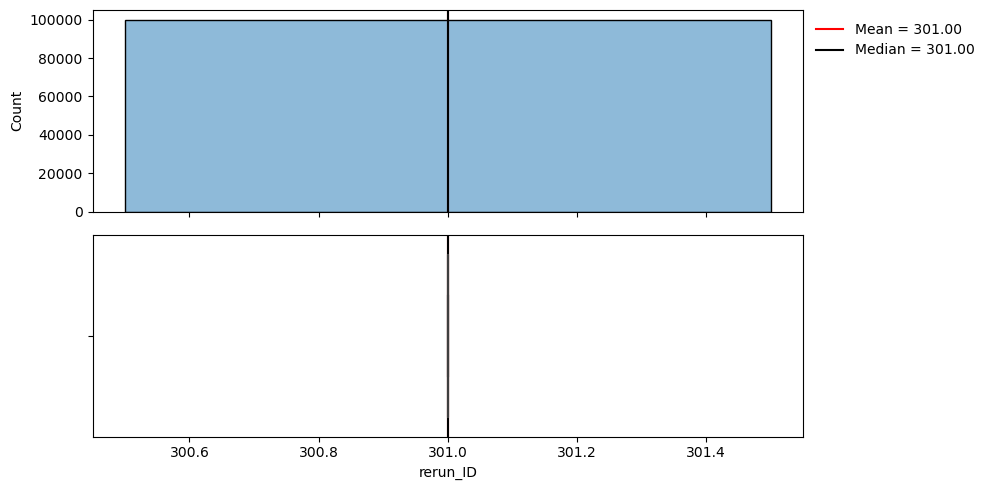

count    100000.0
mean        301.0
std           0.0
min         301.0
25%         301.0
50%         301.0
75%         301.0
max         301.0
Name: rerun_ID, dtype: float64

In [23]:
# rerun_ID
whaleyplot(df, 'rerun_ID')
plt.show()

print()
df['rerun_ID'].describe()

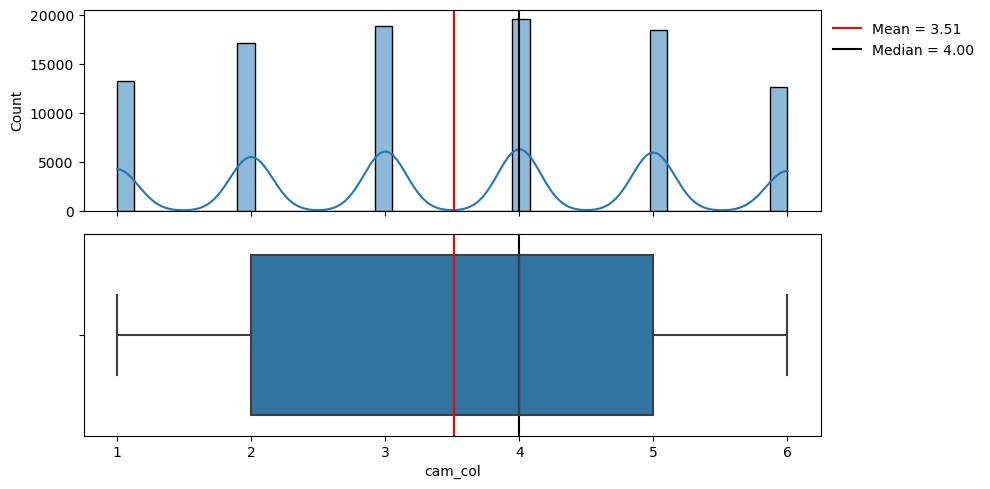

count    100000.000000
mean          3.511610
std           1.586912
min           1.000000
25%           2.000000
50%           4.000000
75%           5.000000
max           6.000000
Name: cam_col, dtype: float64

In [24]:
# cam_col
whaleyplot(df, 'cam_col')
plt.show()

print()
df['cam_col'].describe()

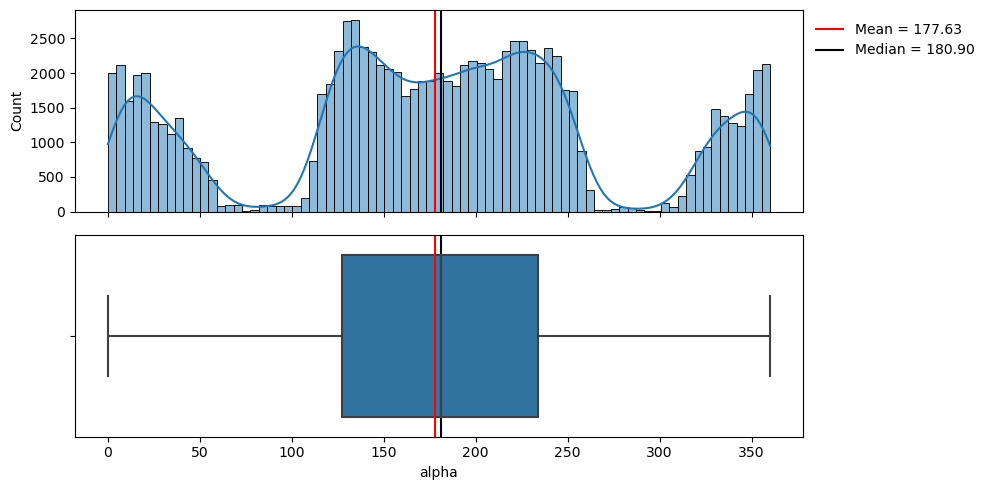

count    100000.000000
mean        177.629117
std          96.502241
min           0.005528
25%         127.518222
50%         180.900700
75%         233.895005
max         359.999810
Name: alpha, dtype: float64

In [25]:
# field_ID
whaleyplot(df, 'alpha')
plt.show()

print()
df['alpha'].describe()

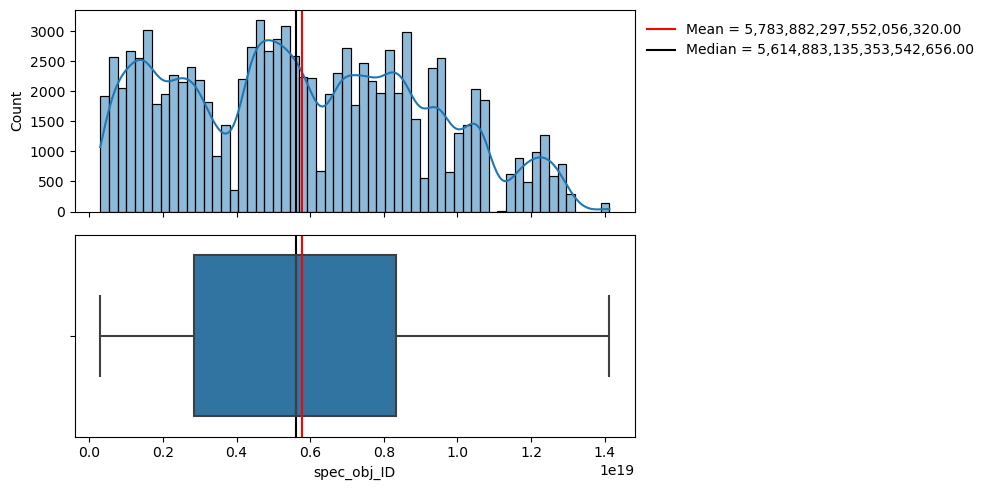

count    1.000000e+05
mean     5.783882e+18
std      3.324016e+18
min      2.995191e+17
25%      2.844138e+18
50%      5.614883e+18
75%      8.332144e+18
max      1.412694e+19
Name: spec_obj_ID, dtype: float64

In [26]:
# spec_obj_ID
whaleyplot(df, 'spec_obj_ID')
plt.show()

print()
df['spec_obj_ID'].describe()

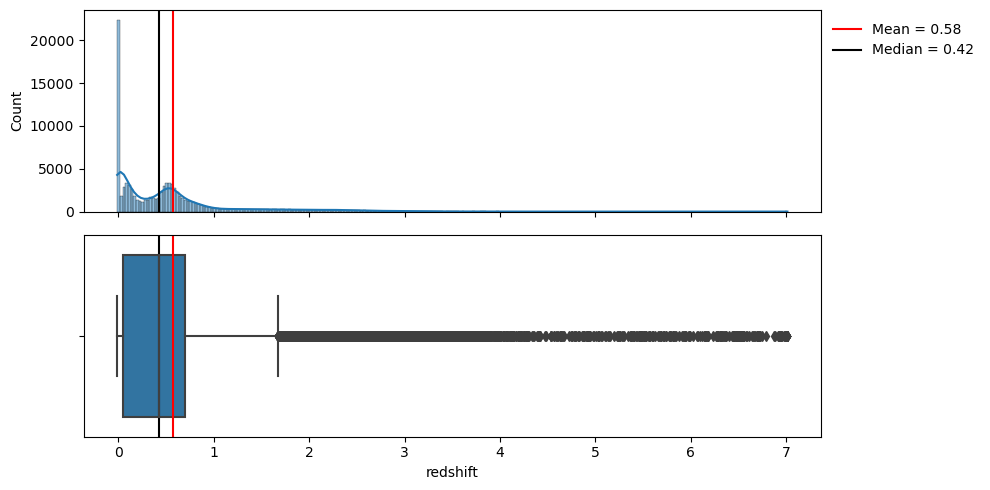

count    100000.000000
mean          0.576661
std           0.730707
min          -0.009971
25%           0.054517
50%           0.424173
75%           0.704154
max           7.011245
Name: redshift, dtype: float64

In [27]:
# redshift
whaleyplot(df, 'redshift')
plt.show()

print()
df['redshift'].describe()

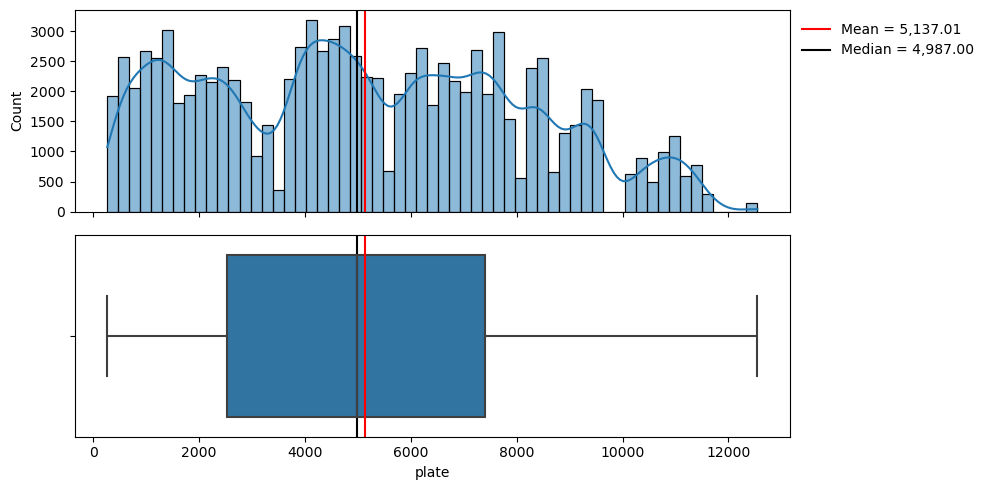

count    100000.000000
mean       5137.009660
std        2952.303351
min         266.000000
25%        2526.000000
50%        4987.000000
75%        7400.250000
max       12547.000000
Name: plate, dtype: float64

In [28]:
# plate
whaleyplot(df, 'plate')
plt.show()

print()
df['plate'].describe()

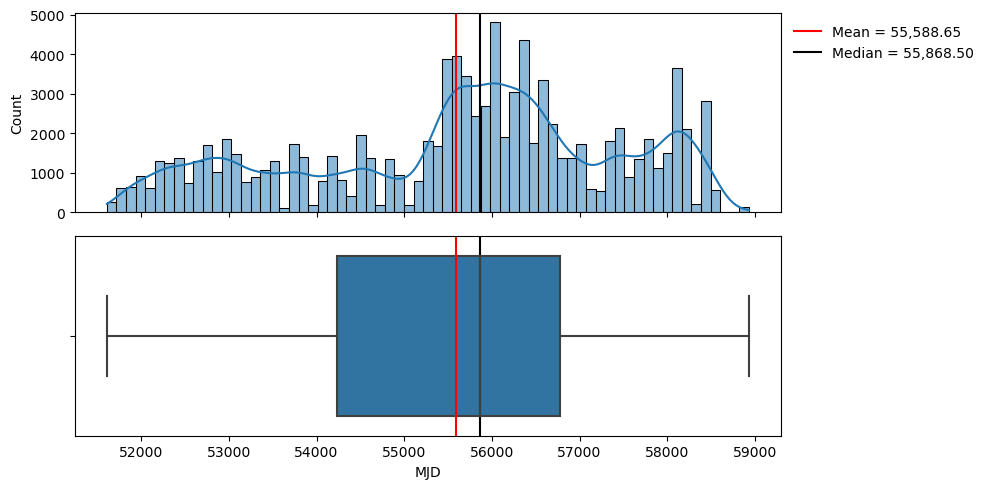

count    100000.000000
mean      55588.647500
std        1808.484233
min       51608.000000
25%       54234.000000
50%       55868.500000
75%       56777.000000
max       58932.000000
Name: MJD, dtype: float64

In [29]:
# MJD
whaleyplot(df, 'MJD')
plt.show()

print()
df['MJD'].describe()

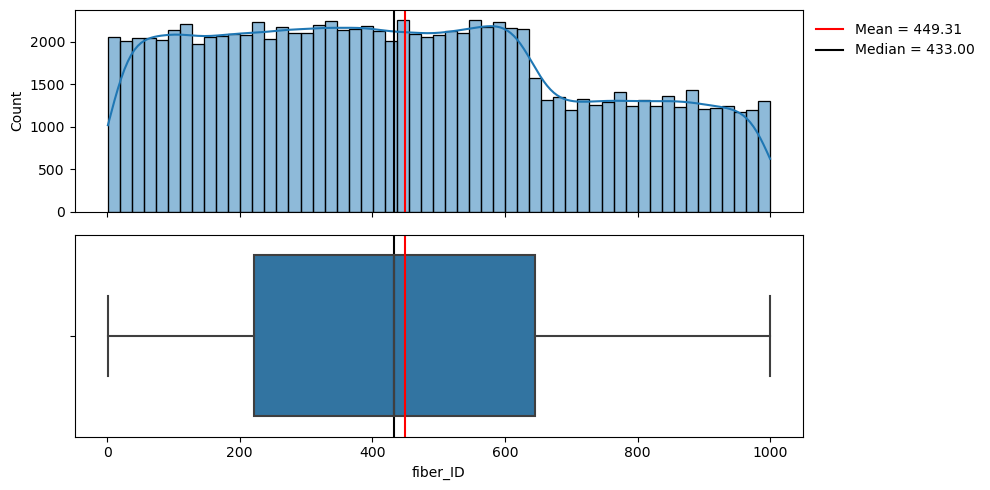

count    100000.000000
mean        449.312740
std         272.498404
min           1.000000
25%         221.000000
50%         433.000000
75%         645.000000
max        1000.000000
Name: fiber_ID, dtype: float64

In [30]:
# fiber_ID
whaleyplot(df, 'fiber_ID')
plt.show()

print()
df['fiber_ID'].describe()

### Target

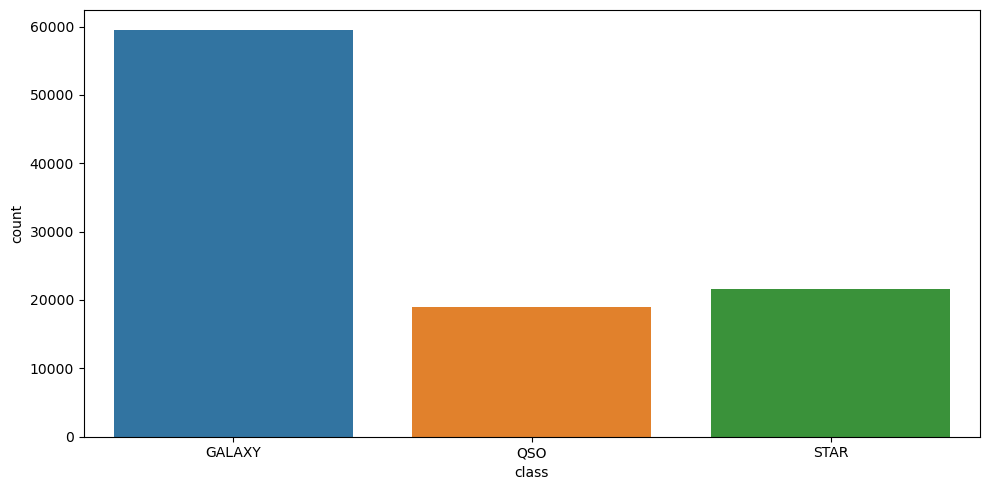

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

In [31]:
# class
barplot(df, 'class')
plt.show()

print()
df['class'].value_counts()

In [32]:
df['class'].value_counts(normalize=True)

GALAXY    0.59445
STAR      0.21594
QSO       0.18961
Name: class, dtype: float64

- The dataset is imbalanced with almost 60% of the target values being 'GALAXY'.